### 【問題1】各種手法の実行

SimpleRNN, LSTM, GRUを下記コードで10epoch計算した結果をまとめる。

GRU > LSTM > SimpleRNNという結果となった。

|| SimpleRNN | LSTM | GRU |
| :---: | :---: | :---: |:---: |
| Test score | 0.523 | 0.883 |1.101 |
| Test accuracy | 0.799 | 0.811 |0.822 |


###   LSTM

In [2]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/10
782/782 [==============================] - 270s 341ms/step - loss: 0.5048 - accuracy: 0.7408 - val_loss: 0.3888 - val_accuracy: 0.8374
Epoch 2/10
782/782 [==============================] - 252s 323ms/step - loss: 0.2527 - accuracy: 0.9002 - val_loss: 0.3688 - val_accuracy: 0.8378
Epoch 3/10
782/782 [==============================] - 267s 341ms/step - loss: 0.1591 - accuracy: 0.9410 - val_loss: 0.4405 - val_accuracy: 0.8254
Epoch 4/10
782/782 [==============================] - 274s 350ms/step - loss: 0.1020 - accuracy: 0.9627 - val_loss: 0.4955 - val_accuracy: 0.8203
Epoch 5/10
782/782 [==============================] - 263s 337ms/step - loss: 0.0637 - accuracy: 0.9773 - val_loss: 0.7660 - val_accuracy: 0.8228
Epoch 6/10
782/782 [==============================] - 243s 311ms/step - loss: 0.0478 - accuracy: 0.9843

### SimpleRNN

In [3]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
#from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))  #LSTM → SimpleRNN
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/10
782/782 [==============================] - 84s 105ms/step - loss: 0.7036 - accuracy: 0.5165 - val_loss: 0.6576 - val_accuracy: 0.6147
Epoch 2/10
782/782 [==============================] - 78s 100ms/step - loss: 0.6115 - accuracy: 0.6592 - val_loss: 0.4508 - val_accuracy: 0.8004
Epoch 3/10
782/782 [==============================] - 79s 102ms/step - loss: 0.4353 - accuracy: 0.8068 - val_loss: 0.5809 - val_accuracy: 0.7668
Epoch 4/10
782/782 [==============================] - 79s 101ms/step - loss: 0.3606 - accuracy: 0.8472 - val_loss: 0.4881 - val_accuracy: 0.7966
Epoch 5/10
782/782 [==============================] - 79s 100ms/step - loss: 0.3237 - accuracy: 0.8687 - val_loss: 0.5953 - val_accuracy: 0.7906
Epoch 6/10
782/782 [==============================] - 79s 102ms/step - loss: 0.2754 - accuracy: 0.8892 - val

### GRU

In [4]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
#from keras.layers import LSTM
from keras.layers import GRU
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))  #LSTM → GRU
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/10
782/782 [==============================] - 181s 229ms/step - loss: 0.5303 - accuracy: 0.7119 - val_loss: 0.3622 - val_accuracy: 0.8426
Epoch 2/10
782/782 [==============================] - 182s 233ms/step - loss: 0.2422 - accuracy: 0.9057 - val_loss: 0.3538 - val_accuracy: 0.8474
Epoch 3/10
782/782 [==============================] - 182s 233ms/step - loss: 0.1278 - accuracy: 0.9560 - val_loss: 0.4106 - val_accuracy: 0.8334
Epoch 4/10
782/782 [==============================] - 180s 230ms/step - loss: 0.0689 - accuracy: 0.9761 - val_loss: 0.5795 - val_accuracy: 0.8276
Epoch 5/10
782/782 [==============================] - 181s 232ms/step - loss: 0.0409 - accuracy: 0.9875 - val_loss: 0.6800 - val_accuracy: 0.8262
Epoch 6/10
782/782 [==============================] - 183s 234ms/step - loss: 0.0232 - accuracy: 0.9928

### ConvLSTM2D

Epoch 1/10
95/95 [==============================] - 1517s 16s/step - loss: 0.8899 - val_loss: 0.6843
Epoch 2/10
95/95 [==============================] - 1771s 19s/step - loss: 0.7874 - val_loss: 0.7060
Epoch 3/10
95/95 [==============================] - 2228s 24s/step - loss: 0.7444 - val_loss: 0.7400
Epoch 4/10
95/95 [==============================] - 1479s 16s/step - loss: 0.7116 - val_loss: 0.7715
Epoch 5/10
95/95 [==============================] - 1294s 14s/step - loss: 0.6816 - val_loss: 0.7937
Epoch 6/10
95/95 [==============================] - 1363s 14s/step - loss: 0.6566 - val_loss: 0.8000
Epoch 7/10
95/95 [==============================] - 1257s 13s/step - loss: 0.6344 - val_loss: 0.7707
Epoch 8/10
95/95 [==============================] - 1248s 13s/step - loss: 0.6152 - val_loss: 0.7155
Epoch 9/10
95/95 [==============================] - 1247s 13s/step - loss: 0.5966 - val_loss: 0.6624
Epoch 10/10
95/95 [==============================] - 1244s 13s/step - loss: 0.5786 - val_lo

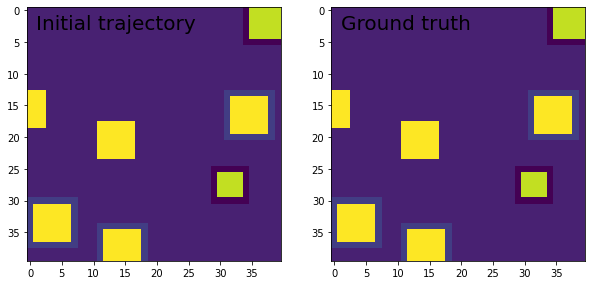

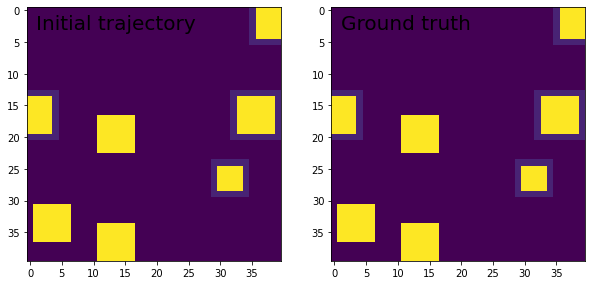

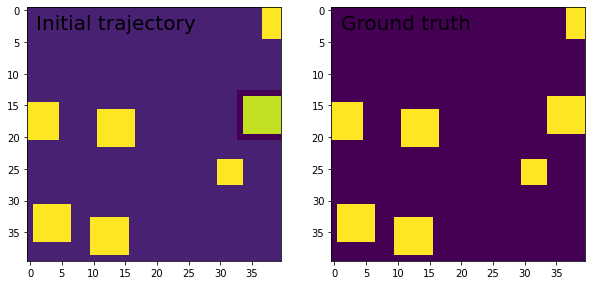

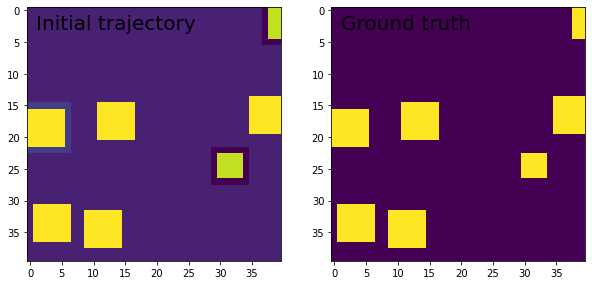

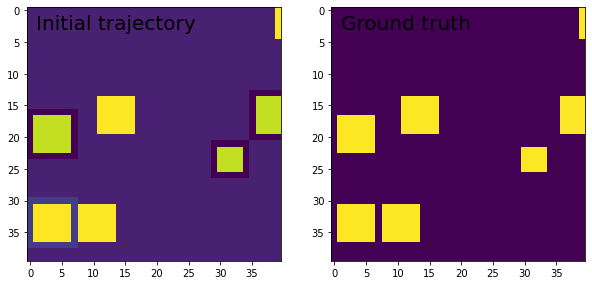

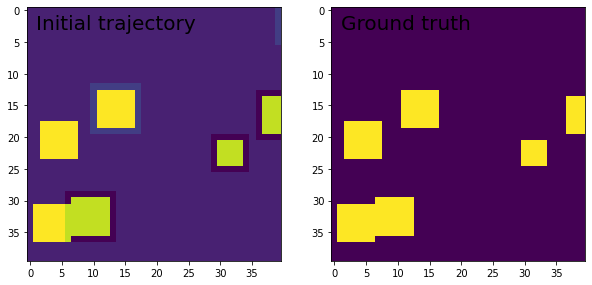

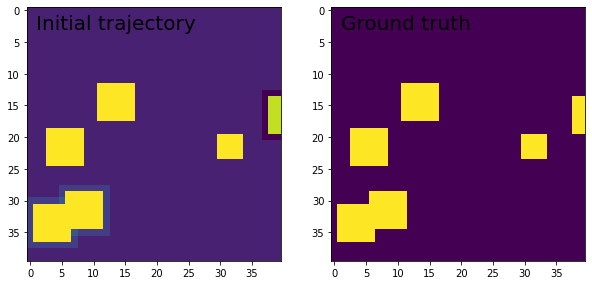

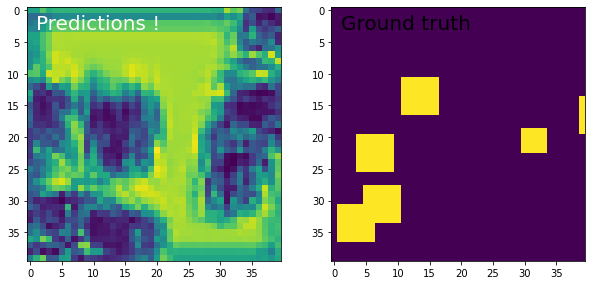

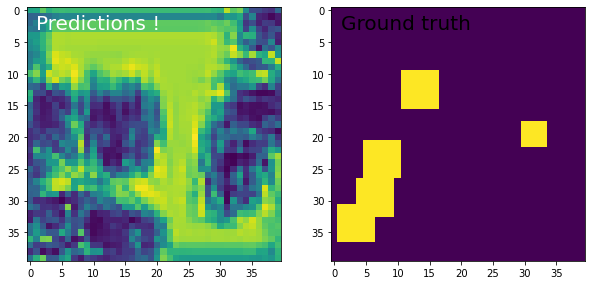

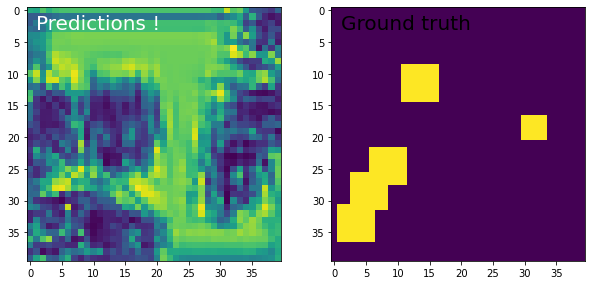

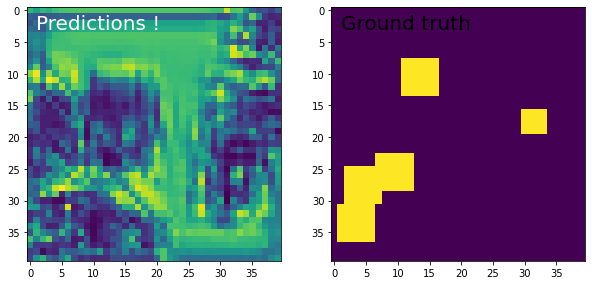

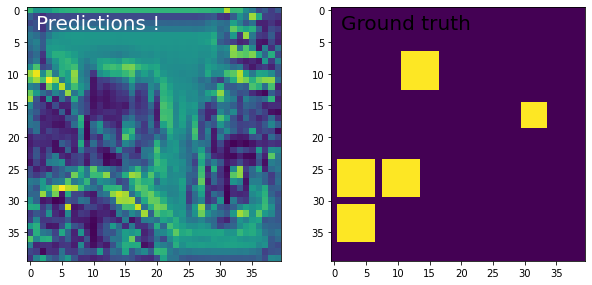

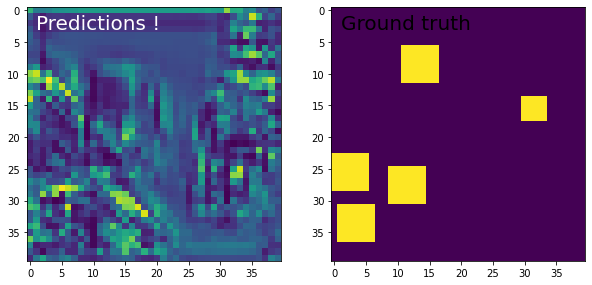

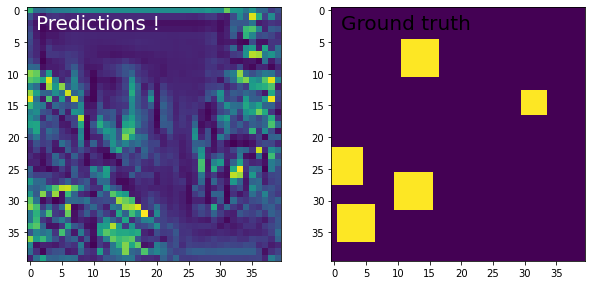

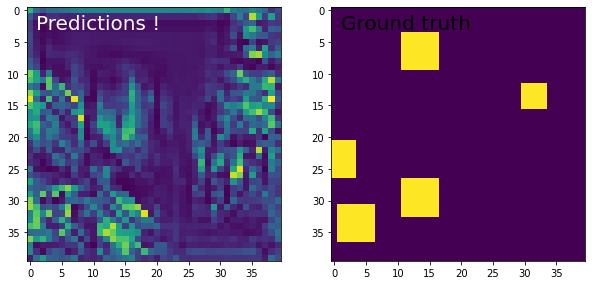

In [6]:
""" This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=10, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

### 【問題3】他のクラスの説明


・RNN、SimpleRNNCell、GRUCell、LSTMCell

　　〜Cellレイヤーで単一のサンプルに対する操作（セル）を定義し、
  
　　  それを RNN() で囲むことによってバッチを処理することができる。
    
  　　Cellレイヤーは、入力シークエンスのバッチ全体を処理するのではなく、
    
  　　単一の時間ステップだけを処理できる。
    
  　　（RNN(LSTMCell(10)) は LSTM (10) と同じ結果となる。）


・StackedRNNCells

　RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー

・CuDNNGRU

　CuDNNを利用した高速なGRU実装。
 
 　TensorFlowバックエンドでGPU上でのみ動作する。


・CuDNNLSTM

　CuDNNを利用した高速なLSTM実装。
 
 　TensorFlowバックエンドでGPU上でのみ動作する。